#**Unsupervised Learning- K Means clustering**
K-mean clustering is a type of unsupervised learning, which is used when you have unlabled data. the goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.
 
#**Problem Statement:**
**Task**: From the given Iris Dataset, predict the optimum number of clusters and represent it visually 

#**Dataset**
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

## Importing data

In [3]:
df=pd.read_csv('Iris.csv')
# Displaying the whole dataset
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
#View the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
#Drop Id and Species column
df_new=df.copy()
df_new.drop(['Id','Species'],axis=1,inplace=True)
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
#Statistical information of data
df_new.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
#Correlation
df_new.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Finding optimum number of clusters

In [22]:
x = df_new.iloc[:, [0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

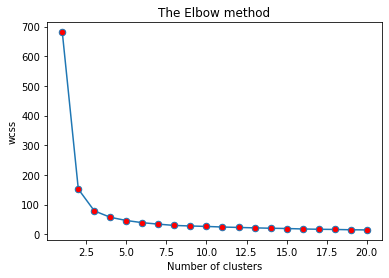

In [23]:
wcss= []
for i in range (1,21):
    model=KMeans(i)
    model.fit(x)
    wcss.append(model.inertia_)
plt.plot(range(1,21), wcss, marker='.',markersize=13,markerfacecolor='r')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
#Finding optimum value of K with the help of Elbow Method
from sklearn.cluster import KMeans
sse=[]
for i in range(1,11):
    k_model1=KMeans(n_clusters=i)
    k_model1.fit(df_new.iloc[:,:-1])
    sse.append(k_model1.inertia_)
sse

[594.0446666666667,
 133.45714841470533,
 69.50013924466339,
 49.50821558441559,
 40.39566666666667,
 32.94925429375864,
 29.195872692927047,
 25.518679653679655,
 23.22048351648352,
 22.29788806291748]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'The Elbow Method')

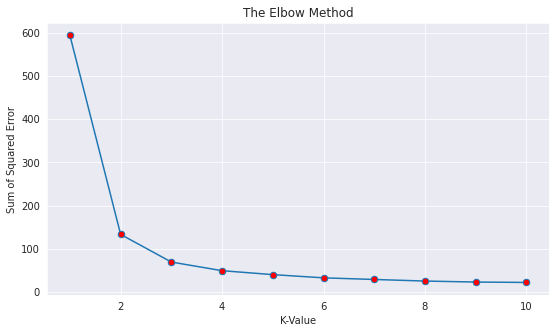

In [26]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(9,5))
plt.plot(range(1,11),sse,marker='.',markersize=13,markerfacecolor='r')
plt.xlabel('K-Value')
plt.ylabel('Sum of Squared Error')
plt.title('The Elbow Method')

In [27]:
#With the help of the above method i.e. elbow method, we could see that K=3 is a more suitable value to proceed further.
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
#Model fitting 
from sklearn.cluster import KMeans
k_model2=KMeans(n_clusters=3,random_state=0)
pred_1=k_model2.fit_predict(df_new)
pred_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [31]:
#Create new column "Cluster" and assign prediction 0,1,2
df_new['Cluster']= pred_1
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


## Visualizing the clusters

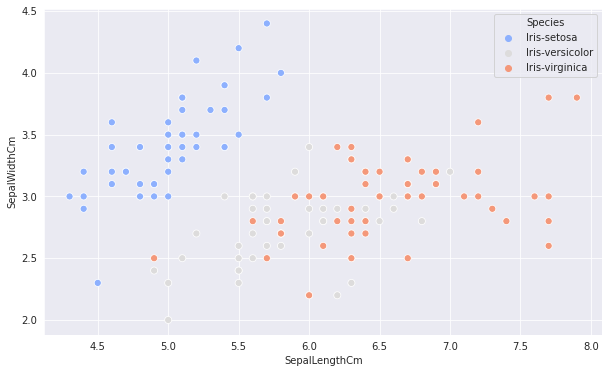

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df, s= 50,hue='Species',palette='coolwarm')

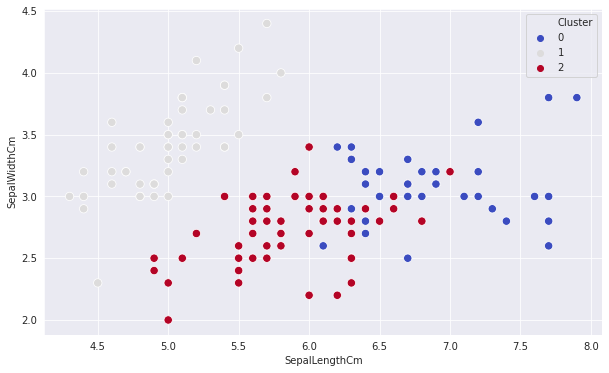

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df_new, s=70, hue='Cluster',palette='coolwarm')

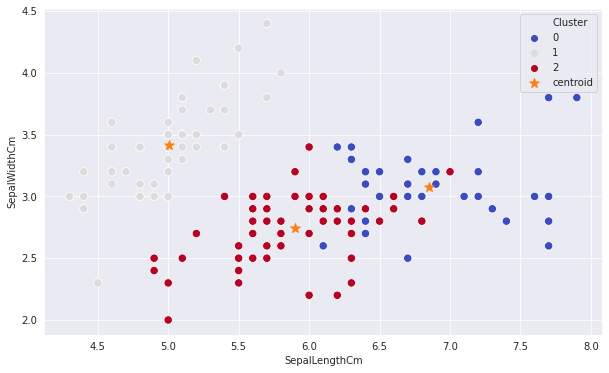

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df_new, s=70, hue='Cluster',palette='coolwarm')

#Centroid of the clusters
plt.scatter(k_model2.cluster_centers_[:,0],k_model2.cluster_centers_[:,1],marker='*',s=100,label='centroid')
plt.legend()

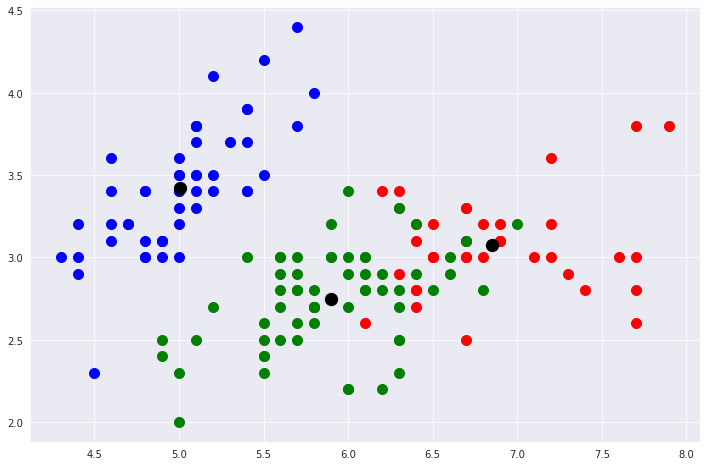

In [47]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(12,8))
plt.scatter(df_new[df_new['Cluster'] == 0].iloc[:,0], df_new[df_new['Cluster'] == 0].iloc[:,1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df_new[df_new['Cluster'] == 1].iloc[:,0], df_new[df_new['Cluster'] == 1].iloc[:,1], 
            s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(df_new[df_new['Cluster'] == 2].iloc[:,0], df_new[df_new['Cluster'] == 2].iloc[:,1], 
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_model2.cluster_centers_[:, 0], k_model2.cluster_centers_[:,1],
            s = 150, c = 'black', label = 'Centroids')
